<a href="https://colab.research.google.com/github/CseMony/MY_thesis/blob/main/face_alexnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from skimage import io
import pandas as pd
import os
from skimage.color import rgb2gray
from skimage import data, color, exposure
from PIL import Image

dataset_path = '/gdrive/My Drive/gt_db'

dataset_dir  = os.listdir(dataset_path)
count=0 
training_data=[]
img_size=227
train_path='/gdrive/My Drive/cropped_faces'
#class_num=13233
def create_training_data():
  
                    
  for i in os.listdir(dataset_path):
      path=['/gdrive/My Drive/gt_db/'+i]
      #print(path)
      for j in path: 
        #print(i)
          directory  = os.listdir(j)
          for k in directory:
            filename=j+'/'+k
            if k.endswith(".jpg"):
              img = io.imread(filename)
             
              #print(filename)
              cls = filename.split("/")[4]
              class_num=cls[1]+cls[2]
              class_num=int(class_num)
              class_num=class_num-1
              #print(class_num)
              
              new_array=cv2.resize(img,(img_size,img_size),3)
              training_data.append([new_array,class_num])
            
create_training_data()     


In [ ]:
X=[]
y=[]
for feature,label in training_data:
  X.append(feature)
  y.append(label)
X=np.array(X).reshape(-1,img_size,img_size,3) 
y = np.array(y).reshape(-1, 1) 


In [ ]:
X=X/255.0

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2,stratify=y,random_state=42)

In [ ]:
for i in range(50):
 print(i,np.count_nonzero(y_test==i))

0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 3
8 3
9 3
10 3
11 3
12 3
13 3
14 3
15 3
16 3
17 3
18 3
19 3
20 3
21 3
22 3
23 3
24 3
25 3
26 3
27 3
28 3
29 3
30 3
31 3
32 3
33 3
34 3
35 3
36 3
37 3
38 3
39 3
40 3
41 3
42 3
43 3
44 3
45 3
46 3
47 3
48 3
49 3


In [ ]:

from tensorflow.keras import backend
from tensorflow import keras
from keras import regularizers
from keras.regularizers import l2,l1
#Instantiate an empty model
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model=tf.keras.models.Sequential()

# C1 Convolutional Layer
#64 add
model.add(keras.layers.Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='relu',input_shape=(img_size,img_size,3),kernel_initializer='glorot_uniform', padding='valid'))
#model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'))
#keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)
model.add(keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2,2), padding='valid'))

#model.add(keras.layers.Conv2D(96, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='same'))
model.add(keras.layers.Conv2D(256, kernel_size=(5, 5), strides=(1, 1), activation='relu',kernel_initializer='glorot_uniform', padding='same'))
#keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)
model.add(keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2,2), padding='valid'))

model.add(keras.layers.Conv2D(384, kernel_size=(3, 3), strides=(1, 1), activation='relu',kernel_initializer='glorot_uniform', padding='same'))
model.add(keras.layers.Conv2D(384, kernel_size=(3, 3), strides=(1, 1), activation='relu',kernel_initializer='glorot_uniform', padding='same'))
model.add(keras.layers.Conv2D(256, kernel_size=(3, 3), strides=(1, 1), activation='relu',kernel_initializer='glorot_uniform', padding='same'))
#keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)
model.add(keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2,2), padding='valid'))        

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 384)       885120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 384)       1327488   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 256)       8

In [ ]:

model.add(keras.layers.Flatten())

In [ ]:

#model.add(keras.layers.Dense(9216, activation='relu'))


model.add(keras.layers.Dense(4096,kernel_initializer='glorot_uniform', activation='relu'))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Dense(4096,kernel_initializer='glorot_uniform', activation='relu'))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Dense(50, activation='softmax'))

# Compile the model


#model.compile(loss=tf.losses.sigmoid_cross_entropy, optimizer='sgd', metrics=['accuracy'])
model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(lr=0.0001,decay=0.001), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 384)       885120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 384)       1327488   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 256)       8

In [ ]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=3, verbose=1, mode='auto')
hist = model.fit(X_train,y_train,steps_per_epoch=30, validation_data= (X_test,y_test), validation_steps=2,epochs=15,callbacks=[checkpoint,early])

Epoch 1/15
30/30 [==============================] - 90s 3s/step - loss: 3.9225 - accuracy: 0.0061 - val_loss: 3.9099 - val_accuracy: 0.0400
Epoch 2/15
30/30 [==============================] - 89s 3s/step - loss: 3.9042 - accuracy: 0.0540 - val_loss: 3.7161 - val_accuracy: 0.0733
Epoch 3/15
30/30 [==============================] - 89s 3s/step - loss: 3.3455 - accuracy: 0.1212 - val_loss: 2.2351 - val_accuracy: 0.4667
Epoch 4/15
30/30 [==============================] - 89s 3s/step - loss: 1.9213 - accuracy: 0.4731 - val_loss: 1.2395 - val_accuracy: 0.6533
Epoch 5/15
30/30 [==============================] - 89s 3s/step - loss: 1.0006 - accuracy: 0.7042 - val_loss: 0.8693 - val_accuracy: 0.7533
Epoch 6/15
30/30 [==============================] - 96s 3s/step - loss: 0.6285 - accuracy: 0.8035 - val_loss: 0.4504 - val_accuracy: 0.8933
Epoch 7/15
30/30 [==============================] - 91s 3s/step - loss: 0.2907 - accuracy: 0.9310 - val_loss: 0.1916 - val_accuracy: 0.9533
Epoch 8/15
30/30 [==

In [ ]:
model.evaluate(X_test,y_test)

5/5 [==============================] - 6s 1s/step - loss: 0.1608 - accuracy: 0.9867


[0.16078200936317444, 0.9866666793823242]

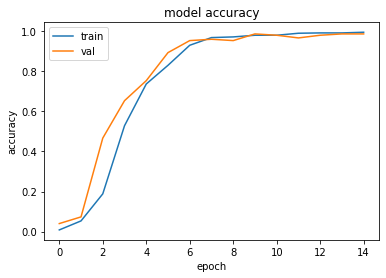

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

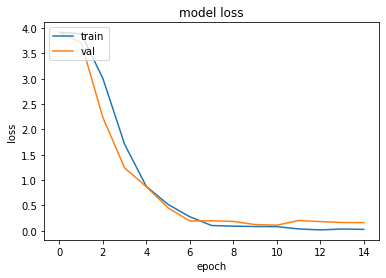

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.save('epic_face_reader.model')

INFO:tensorflow:Assets written to: epic_face_reader.model/assets


In [ ]:
new_model = tf.keras.models.load_model('epic_face_reader.model')
predictions = new_model.predict([X_test])
print(predictions)

import numpy as np

print(np.argmax(predictions[11]))

[[4.0607068e-07 1.8259008e-10 1.4743536e-10 ... 5.2795862e-08
  1.3338445e-05 9.9972445e-01]
 [3.0011848e-05 3.4194125e-09 1.2199550e-07 ... 7.5570679e-09
  2.2949046e-06 2.8649223e-05]
 [1.8991071e-09 1.3629085e-10 1.1701882e-18 ... 2.1753724e-14
  2.8572624e-12 8.5654312e-07]
 ...
 [7.9530531e-05 4.9180242e-05 1.1106930e-05 ... 9.8855878e-08
  4.7798680e-05 4.0673108e-06]
 [1.1001050e-05 8.6745061e-08 2.0550996e-09 ... 1.2571083e-09
  1.3105299e-05 1.2227841e-06]
 [3.6446041e-10 1.9449474e-16 3.9641286e-09 ... 3.8481844e-06
  2.8575264e-09 1.2117304e-10]]
4


In [ ]:
predicted_classes = np.argmax(np.round(predictions),axis=1)

In [ ]:
correct = np.where(predicted_classes==y_test)[0]
print("Found %d correct labels" % len(correct))


Found 450 correct labels


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
target_names = ["Class {}".format(i) for i in range(50)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.60      1.00      0.75         3
     Class 1       1.00      1.00      1.00         3
     Class 2       1.00      1.00      1.00         3
     Class 3       1.00      1.00      1.00         3
     Class 4       1.00      1.00      1.00         3
     Class 5       1.00      1.00      1.00         3
     Class 6       1.00      1.00      1.00         3
     Class 7       1.00      1.00      1.00         3
     Class 8       1.00      1.00      1.00         3
     Class 9       1.00      1.00      1.00         3
    Class 10       1.00      1.00      1.00         3
    Class 11       1.00      1.00      1.00         3
    Class 12       1.00      1.00      1.00         3
    Class 13       1.00      0.67      0.80         3
    Class 14       1.00      1.00      1.00         3
    Class 15       1.00      1.00      1.00         3
    Class 16       1.00      1.00      1.00         3
    Class 17       1.00    

In [ ]:
cm=confusion_matrix(y_test,predicted_classes)
def plot_confusion_matrix(cm,classes,normalize=False,cmap=plt.cm.Blues,title='confusion matrix'):
  plt.gcf().set_size_inches(15,15)
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)

  if normalize:
    cm=cm.astype('float'/cm.sum(axis=1)[:,np.newaxis])
    print("normalized confusion matrix")
  else:
    print('confusion matrix without normalization')

  print(cm)

  thresh=cm.max()/2
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(i,j,cm[i,j],horizontalalignment='center',color='white' if cm[i,j]>thresh else 'black')
  
  plt.tight_layout()
  plt.ylabel("true label")
  plt.xlabel("Predicted label")

confusion matrix without normalization
[[3 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 3]]


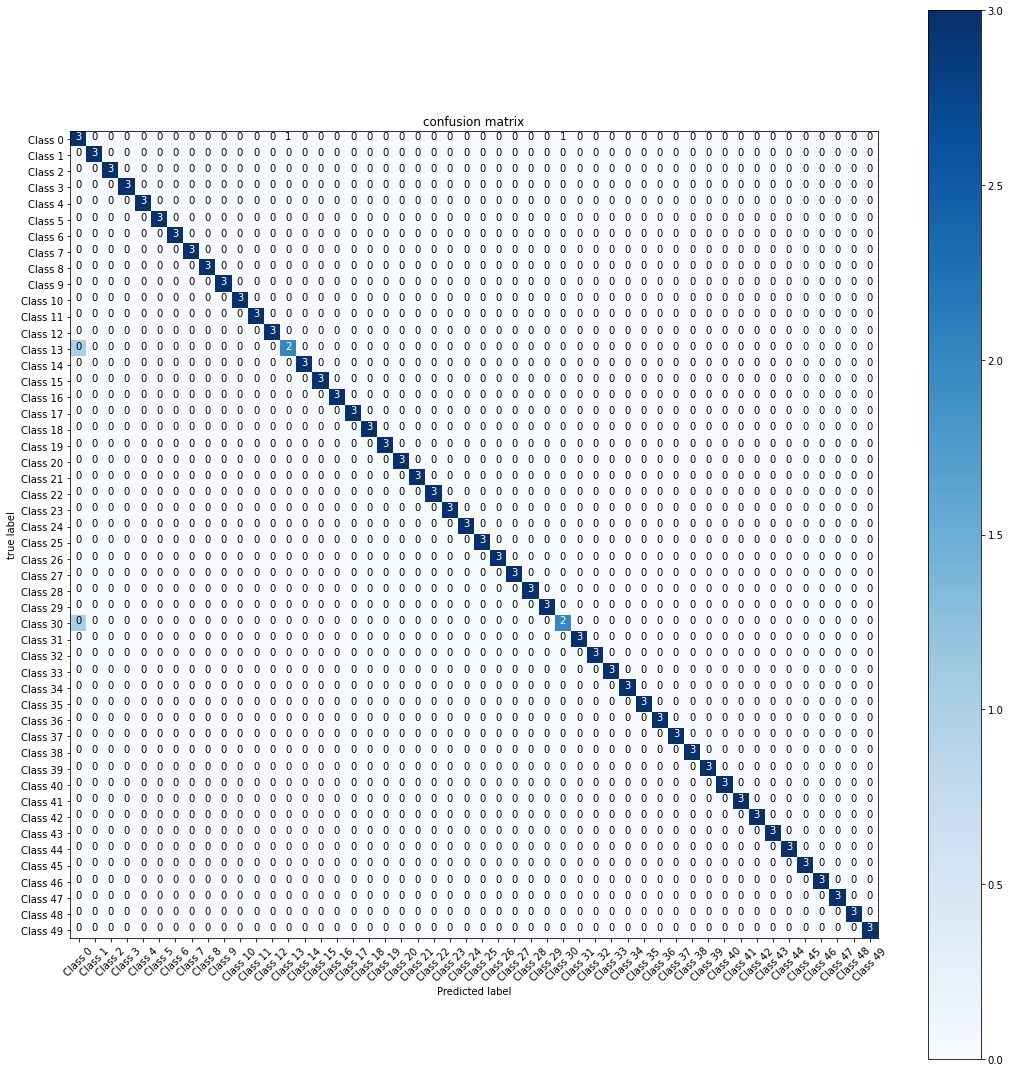

In [ ]:
import itertools
plot_confusion_matrix(cm,target_names)

In [ ]:
layer_names = [] 
  
for layer in model.layers: 
  layer_names.append(layer.name) 
print(layer_names) 

['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'conv2d_3', 'conv2d_4', 'max_pooling2d_2', 'flatten', 'dense', 'dropout', 'dense_1', 'dropout_1', 'dense_2']


In [ ]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:13]] 
activation_model = models.Model(inputs = model.input, outputs = layer_outputs) 
activations = activation_model.predict(X_test) 

In [ ]:
type(X_test[11]),X_test[11].shape

(numpy.ndarray, (227, 227, 3))

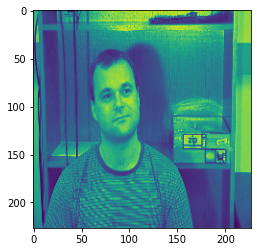

In [ ]:
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers[0:]]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
plt.imshow(X_train[11][:,:,0])
activations = activation_model.predict(X_train[11].reshape(1,img_size,img_size,3))


 
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

In [ ]:
layer_outputs

[<KerasTensor: shape=(None, 55, 55, 96) dtype=float32 (created by layer 'conv2d')>,
 <KerasTensor: shape=(None, 27, 27, 96) dtype=float32 (created by layer 'max_pooling2d')>,
 <KerasTensor: shape=(None, 27, 27, 256) dtype=float32 (created by layer 'conv2d_1')>,
 <KerasTensor: shape=(None, 13, 13, 256) dtype=float32 (created by layer 'max_pooling2d_1')>,
 <KerasTensor: shape=(None, 13, 13, 384) dtype=float32 (created by layer 'conv2d_2')>,
 <KerasTensor: shape=(None, 13, 13, 384) dtype=float32 (created by layer 'conv2d_3')>,
 <KerasTensor: shape=(None, 13, 13, 256) dtype=float32 (created by layer 'conv2d_4')>,
 <KerasTensor: shape=(None, 6, 6, 256) dtype=float32 (created by layer 'max_pooling2d_2')>,
 <KerasTensor: shape=(None, 9216) dtype=float32 (created by layer 'flatten')>,
 <KerasTensor: shape=(None, 4096) dtype=float32 (created by layer 'dense')>,
 <KerasTensor: shape=(None, 4096) dtype=float32 (created by layer 'dropout')>,
 <KerasTensor: shape=(None, 4096) dtype=float32 (created

In [ ]:
last_layer_activation = activations[12] 

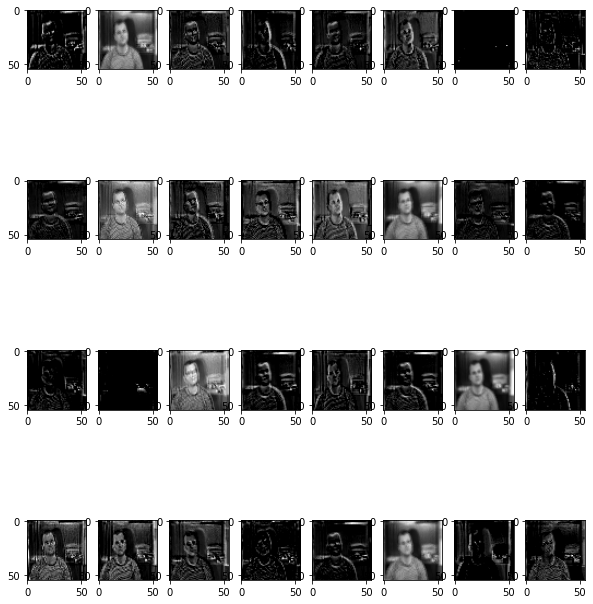

In [ ]:
display_activation(activations, 8, 4, 0)

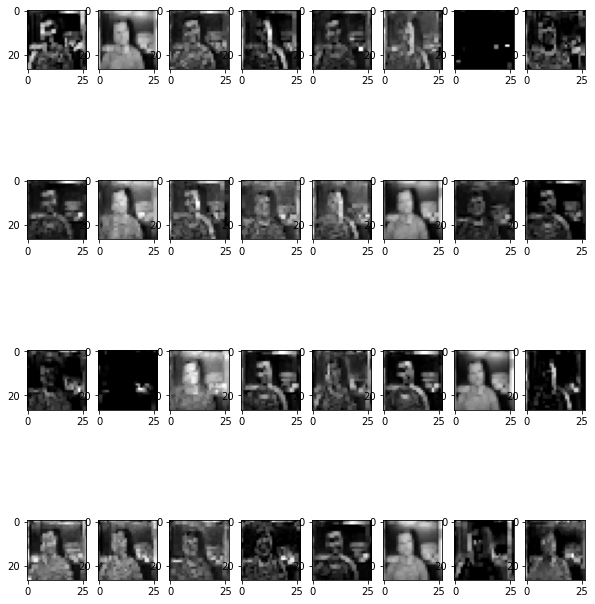

In [ ]:
display_activation(activations, 8, 4, 1)

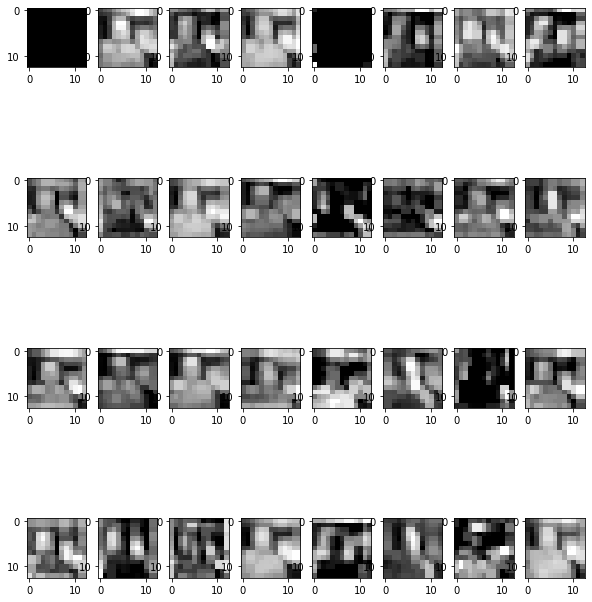

In [ ]:
display_activation(activations, 8, 4, 3)

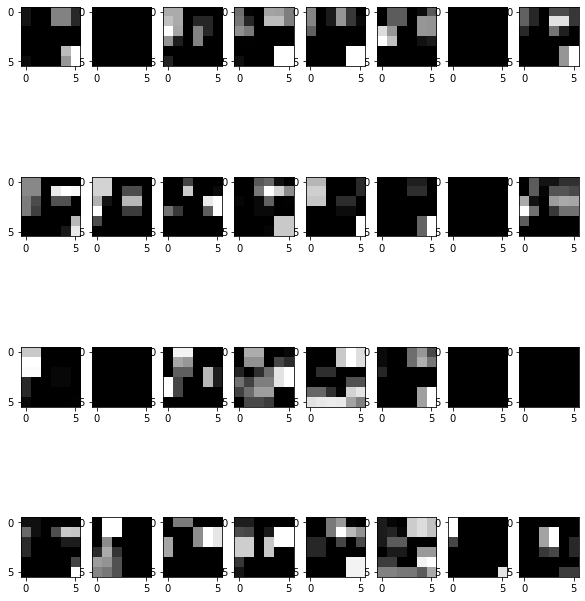

In [ ]:
display_activation(activations, 8, 4, 7)

In [ ]:
predicted_classes

array([49, 32, 12, 23, 47,  8, 27, 21, 32,  7, 46,  4, 46,  2, 41,  9, 41,
       39, 27, 36, 12,  4, 45,  0,  5, 34, 23, 43, 30, 47, 49,  5, 45,  3,
       31, 40, 39, 48, 17, 25,  6, 27, 11, 42, 21, 33, 28, 48, 24,  1, 18,
       16, 14, 33, 44, 37, 41,  8,  3,  7, 31, 38, 13, 19, 35, 20, 20, 13,
       35,  4, 26, 16,  1, 15, 30, 16, 28, 20, 48, 44, 26, 17, 42, 32, 15,
       21, 24, 10,  2, 45,  1, 38, 11,  9,  5, 39, 11, 14, 29, 22,  0,  0,
       43, 26, 17, 19, 40, 14, 47, 15, 18, 42,  0, 10, 33, 22,  9, 37, 12,
       34,  6,  2, 43, 29,  0, 40, 22, 44,  8, 31, 35, 37, 19,  7, 36, 38,
       23,  6, 24,  3, 29, 25, 28, 10, 36, 49, 18, 25, 34, 46])